In [1]:
from libraries import lib
from libraries.NeuralStates import *
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn

In [2]:
N = 6
J = 1
Gamma = 1

In [3]:
h = lib.TFIM_hamiltonian(N, J, Gamma)
min_energy = h.eigenstates()[0][0]
min_energy

np.float64(-7.727406610312534)

In [4]:
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])
def normal_x(x, sigma, bounds = (float('-inf'), float('inf'))):
    new_x = round(npr.normal(x, sigma)) % (bounds[1] + 1)
    return new_x
def uniform_x(min, max):
    return npr.randint(min, max + 1)
def bitflip_x(x, N, flips):
    new_x = x
    for _ in range(flips):
        new_x = x ^ (1 << npr.randint(0, N))
    return new_x

In [5]:
num_samples = 32
num_epochs = 500 + 1
data_rate = 1

-2.9156241416931152
-7.090985298156738


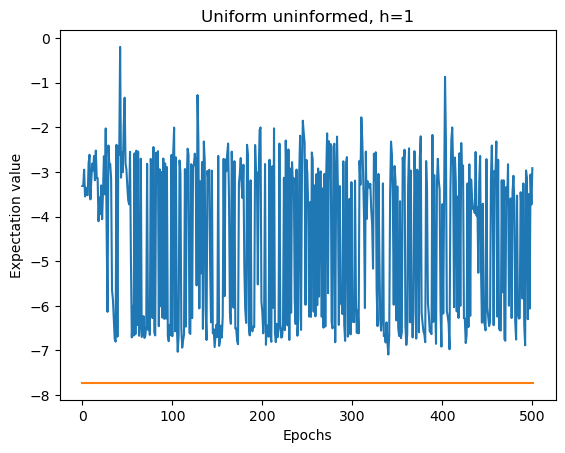

In [6]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = UniformNeuralState(N, model, amp_phase, num_samples)
    # MHNeuralState(N, model, amp_phase, 
    #                        lambda x : uniform_x(0, 2 ** N -1), 5, num_samples, 50)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
print(min(loss_data))
plt.plot(epochs, loss_data)
plt.plot([0, 501], [min_energy] * 2)
plt.title(f'Uniform uninformed, h={Gamma}')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

-7.204285621643066
-7.2886152267456055


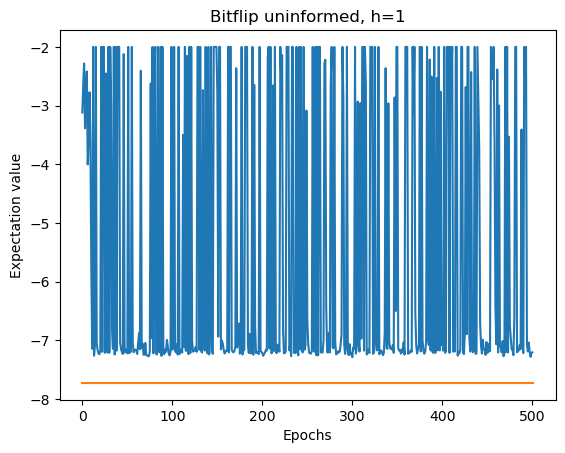

In [7]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = MHNeuralState(N, model, amp_phase, 
                           lambda x : bitflip_x(x, N, 1), 5, num_samples, 50)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
print(min(loss_data))
plt.plot(epochs, loss_data)
plt.plot([0, 501], [min_energy] * 2)
plt.title(f'Bitflip uninformed, h={Gamma}')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

-6.912810325622559
-7.264354705810547


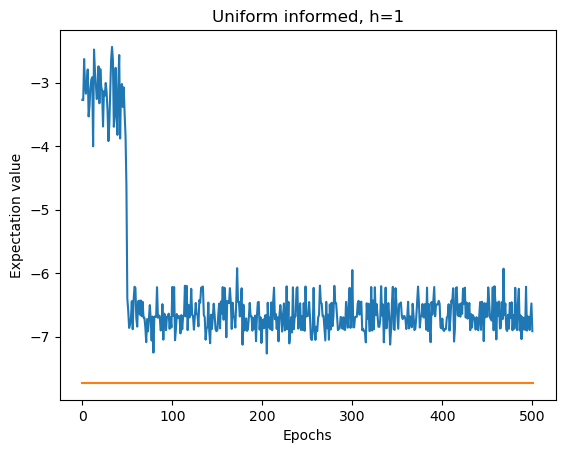

In [8]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = UniformNeuralState(N, model, amp_phase, num_samples, informed=True)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
print(min(loss_data))
plt.plot(epochs, loss_data)
plt.plot([0, 501], [min_energy] * 2)
plt.title(f'Uniform informed, h={Gamma}')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

-7.205755233764648
-7.320933818817139


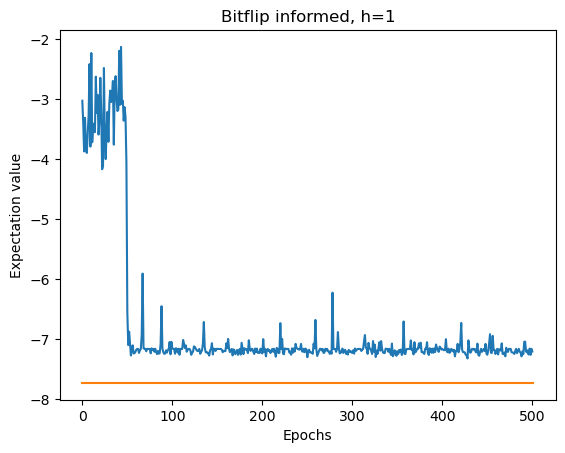

In [9]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = MHNeuralState(N, model, amp_phase, 
                           lambda x : bitflip_x(x, N, 1), 5, num_samples, 50, informed = True)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
print(min(loss_data))
plt.plot(epochs, loss_data)
plt.plot([0, 501], [min_energy] * 2)
plt.title(f'Bitflip informed, h={Gamma}')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

In [24]:
Gamma = 0.1

In [25]:
h = lib.TFIM_hamiltonian(N, J, 0.1)
min_energy = h.eigenstates()[0][0]
min_energy

np.float64(-6.015009643654403)

-6.0010457038879395
-6.006411075592041


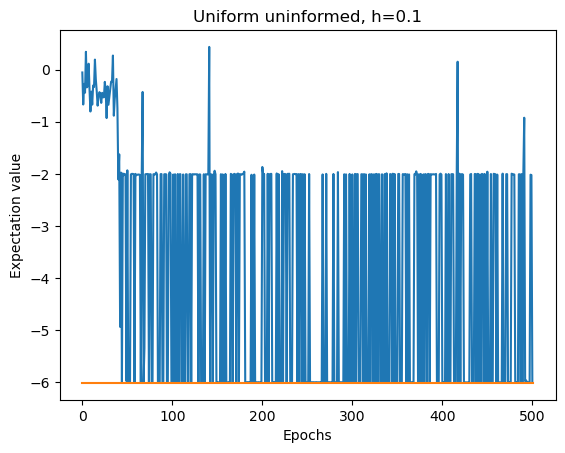

In [26]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = UniformNeuralState(N, model, amp_phase, num_samples)
    # MHNeuralState(N, model, amp_phase, 
    #                        lambda x : uniform_x(0, 2 ** N -1), 5, num_samples, 50)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
print(min(loss_data))
plt.plot(epochs, loss_data)
plt.plot([0, 501], [min_energy] * 2)
plt.title(f'Uniform uninformed, h={Gamma}')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

-2.0
-6.010157585144043


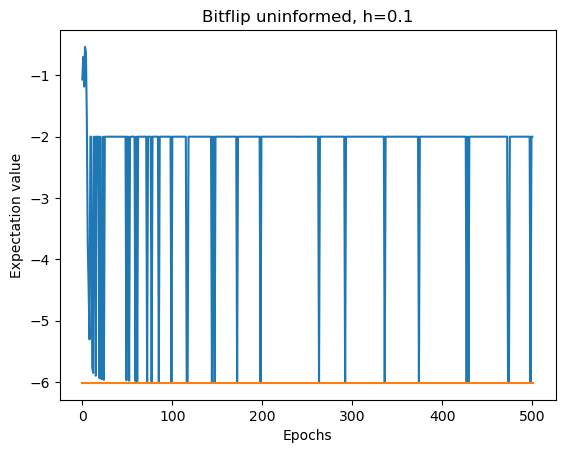

In [27]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = MHNeuralState(N, model, amp_phase, 
                           lambda x : bitflip_x(x, N, 1), 5, num_samples, 50)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
print(min(loss_data))
plt.plot(epochs, loss_data)
plt.plot([0, 501], [min_energy] * 2)
plt.title(f'Bitflip uninformed, h={Gamma}')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

-6.007482051849365
-6.0149641036987305


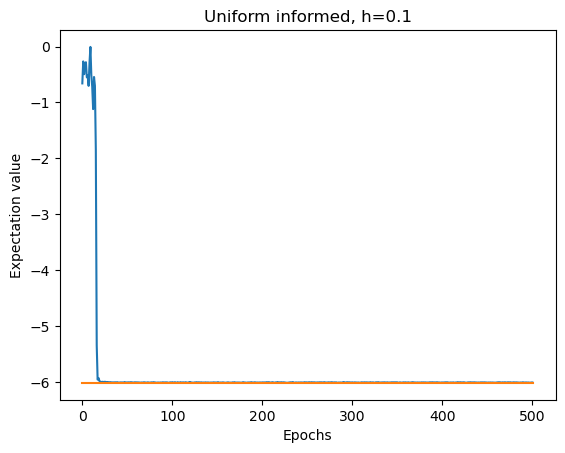

In [28]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = UniformNeuralState(N, model, amp_phase, num_samples, informed=True)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
print(min(loss_data))
plt.plot(epochs, loss_data)
plt.plot([0, 501], [min_energy] * 2)
plt.title(f'Uniform informed, h={Gamma}')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

-6.014944553375244
-6.0149455070495605


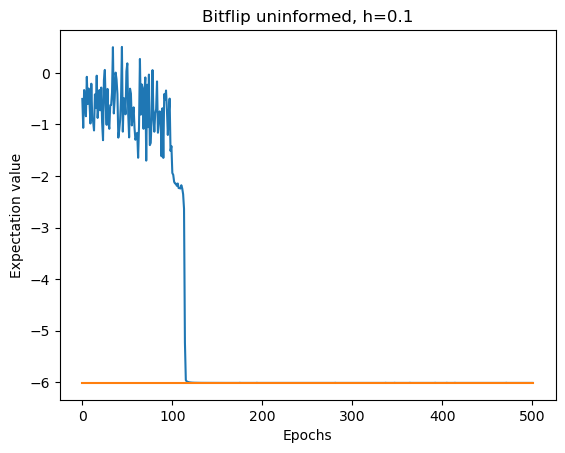

In [29]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = MHNeuralState(N, model, amp_phase, 
                           lambda x : bitflip_x(x, N, 1), 5, num_samples, 50, informed = True)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
print(min(loss_data))
plt.plot(epochs, loss_data)
plt.plot([0, 501], [min_energy] * 2)
plt.title(f'Bitflip uninformed, h={Gamma}')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

In [16]:
Gamma = 10

In [17]:
h = lib.TFIM_hamiltonian(N, J, 10)
min_energy = h.eigenstates()[0][0]
min_energy

np.float64(-60.15009643654393)

-26.87451934814453
-36.87360763549805


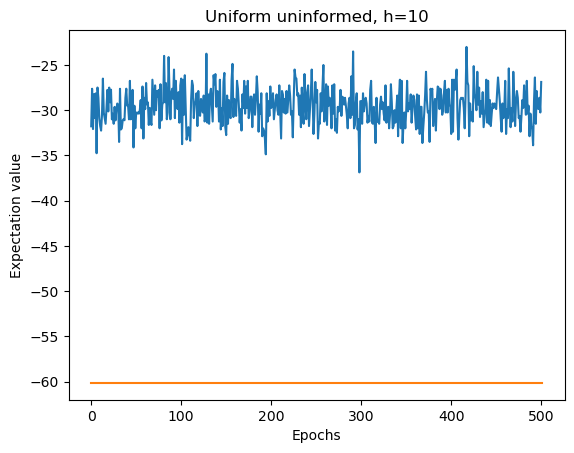

In [18]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = UniformNeuralState(N, model, amp_phase, num_samples)
    # MHNeuralState(N, model, amp_phase, 
    #                        lambda x : uniform_x(0, 2 ** N -1), 5, num_samples, 50)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
print(min(loss_data))
plt.plot(epochs, loss_data)
plt.plot([0, 501], [min_energy] * 2)
plt.title(f'Uniform uninformed, h={Gamma}')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

-35.272708892822266
-38.1666259765625


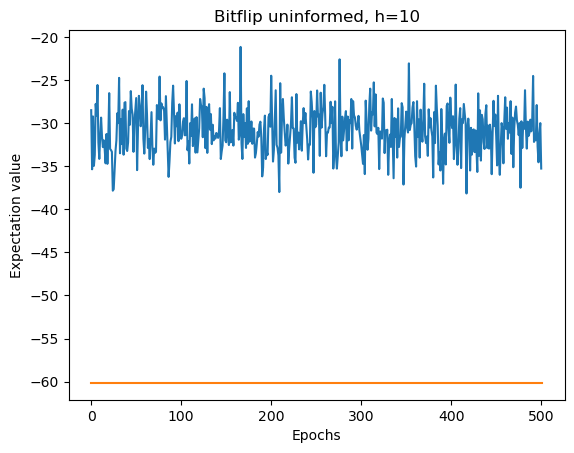

In [19]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = MHNeuralState(N, model, amp_phase, 
                           lambda x : bitflip_x(x, N, 1), 5, num_samples, 50)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
print(min(loss_data))
plt.plot(epochs, loss_data)
plt.plot([0, 501], [min_energy] * 2)
plt.title(f'Bitflip uninformed, h={Gamma}')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

-32.62448501586914
-36.37516784667969


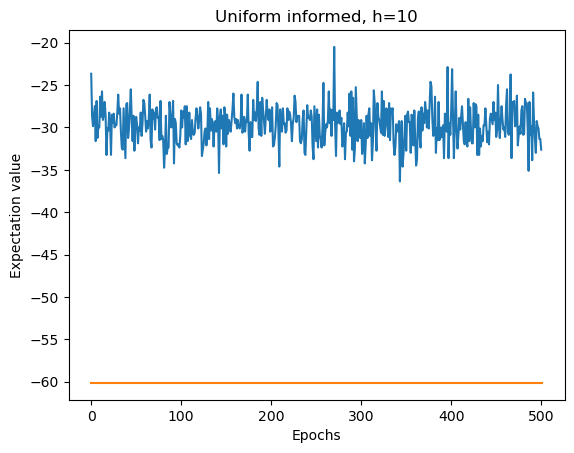

In [20]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = UniformNeuralState(N, model, amp_phase, num_samples, informed=True)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
print(min(loss_data))
plt.plot(epochs, loss_data)
plt.plot([0, 501], [min_energy] * 2)
plt.title(f'Uniform informed, h={Gamma}')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

-26.600000381469727
-39.043479919433594


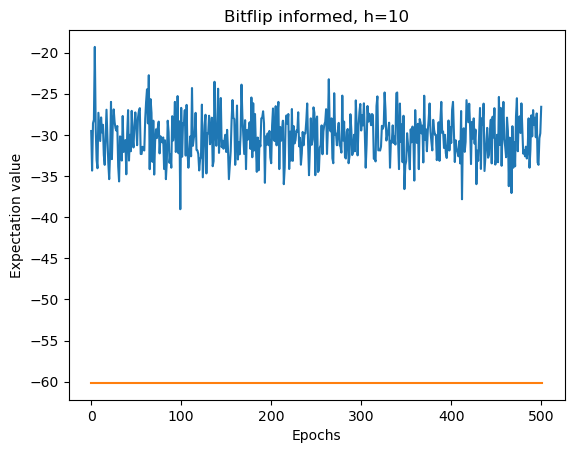

In [21]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
vars = (N, J, Gamma)
loss_fn = SparseStateVector.TFIM_expectation_from_sparse
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 2)
for epoch in range(num_epochs):
    y_pred = MHNeuralState(N, model, amp_phase, 
                           lambda x : bitflip_x(x, N, 1), 5, num_samples, 50, informed = True)
    loss = loss_fn(y_pred, N, J, Gamma)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
print(loss_data[-1])
print(min(loss_data))
plt.plot(epochs, loss_data)
plt.plot([0, 501], [min_energy] * 2)
plt.title(f'Bitflip informed, h={Gamma}')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

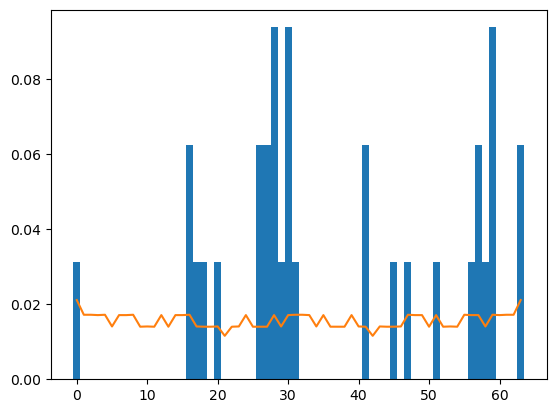

In [22]:
gs = h.eigenstates()[1][0]
gs = gs.full()
hist = plt.hist(y_pred.distribution_to_list(), density = True, bins = [-0.5 + n for n in range(0, 2 ** N + 1)])
plt.plot([n for n in range(0, 2 ** N)], [np.abs(gs[n][0]) ** 2 for n in range(0, 2 ** N)])
plt.show()

In [23]:
sum(loss_data) / len(loss_data)

-30.19146954275653